#### Survy result analysis

In this notebook, I'm exploring the Questions I'm interested in according to the survey results. 

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

df = pd.read_csv('./survey_results_public.csv')
schema = pd.read_csv('./survey_results_schema.csv')
df.head()

Respondent                                       Professional  \
0           1                                            Student   
1           2                                            Student   
2           3                             Professional developer   
3           4  Professional non-developer who sometimes write...   
4           5                             Professional developer   

                ProgramHobby         Country      University  \
0                  Yes, both   United States              No   
1                  Yes, both  United Kingdom  Yes, full-time   
2                  Yes, both  United Kingdom              No   
3                  Yes, both   United States              No   
4  Yes, I program as a hobby     Switzerland              No   

                         EmploymentStatus  \
0  Not employed, and not looking for work   
1                      Employed part-time   
2                      Employed full-time   
3                      Employed full-time   
4                      Employed full-time   

                                     FormalEducation  \
0                                   Secondary school   
1  Some college/university study without earning ...   
2                                  Bachelor's degree   
3                                    Doctoral degree   
4                                    Master's degree   

                                  MajorUndergrad  \
0                                            NaN   
1       Computer science or software engineering   
2       Computer science or software engineering   
3  A non-computer-focused engineering discipline   
4       Computer science or software engineering   

                                          HomeRemote  \
0                                                NaN   
1              More than half, but not all, the time   
2  Less than half the time, but at least one day ...   
3  Less than half the time, but at least one day ...   
4                                              Never   

                CompanySize       ...       StackOverflowMakeMoney Gender  \
0                       NaN       ...            Strongly disagree   Male   
1        20 to 99 employees       ...            Strongly disagree   Male   
2  10,000 or more employees       ...                     Disagree   Male   
3  10,000 or more employees       ...                     Disagree   Male   
4        10 to 19 employees       ...                          NaN    NaN   

  HighestEducationParents                          Race         SurveyLong  \
0             High school  White or of European descent  Strongly disagree   
1       A master's degree  White or of European descent     Somewhat agree   
2   A professional degree  White or of European descent     Somewhat agree   
3       A doctoral degree  White or of European descent              Agree   
4                     NaN                           NaN                NaN   

  QuestionsInteresting QuestionsConfusing InterestedAnswers    Salary  \
0       Strongly agree           Disagree    Strongly agree       NaN   
1       Somewhat agree           Disagree    Strongly agree       NaN   
2                Agree           Disagree             Agree  113750.0   
3                Agree     Somewhat agree    Strongly agree       NaN   
4                  NaN                NaN               NaN       NaN   

   ExpectedSalary  
0             NaN  
1         37500.0  
2             NaN  
3             NaN  
4             NaN  

[5 rows x 154 columns]

## 1. Does developer's interest/preference impact their job satisfaction or career satisfaction?

In [6]:
agree_level_dic = {'Strongly disagree':1, 'Disagree':2, 'Somewhat agree':3, 'Agree':4, 'Strongly agree':5}

# function that convert agree level to 1-5 number
def agree_level_convert(x):
    if x in agree_level_dic.keys():
        return agree_level_dic[x]
    else:
        return x

var_list = ['ProblemSolving',
                'BuildingThings',
                'LearningNewTech',
                'BoringDetails',
                'JobSecurity',
                'DiversityImportant',
                'AnnoyingUI',
                'FriendsDevelopers',
                'RightWrongWay',
                'UnderstandComputers',
                'SeriousWork',
                'InvestTimeTools',
                'WorkPayCare',
                'KinshipDevelopers',
                'ChallengeMyself',
                'CompetePeers',
                'ChangeWorld']

# df.loc[:, var_list] = df[var_list].apply(agree_level_convert)

# convert columns in var_list to 1-5 values
for i in var_list:
    df.loc[:, [i]] = df[i].apply(agree_level_convert)
    print(df[i].head())


0    5.0
1    NaN
2    5.0
3    5.0
4    NaN
Name: ProblemSolving, dtype: float64
0    5.0
1    NaN
2    5.0
3    5.0
4    NaN
Name: BuildingThings, dtype: float64
0    4.0
1    NaN
2    5.0
3    5.0
4    NaN
Name: LearningNewTech, dtype: float64
0    2.0
1    NaN
2    3.0
3    2.0
4    NaN
Name: BoringDetails, dtype: float64
0    5.0
1    NaN
2    4.0
3    3.0
4    NaN
Name: JobSecurity, dtype: float64
0    4.0
1    NaN
2    5.0
3    4.0
4    NaN
Name: DiversityImportant, dtype: float64
0    4.0
1    NaN
2    4.0
3    4.0
4    NaN
Name: AnnoyingUI, dtype: float64
0    2.0
1    NaN
2    3.0
3    4.0
4    NaN
Name: FriendsDevelopers, dtype: float64
0    3.0
1    NaN
2    2.0
3    3.0
4    NaN
Name: RightWrongWay, dtype: float64
0    2.0
1    NaN
2    2.0
3    1.0
4    NaN
Name: UnderstandComputers, dtype: float64
0    5.0
1    NaN
2    4.0
3    5.0
4    NaN
Name: SeriousWork, dtype: float64
0    5.0
1    NaN
2    3.0
3    4.0
4    NaN
Name: InvestTimeTools, dtype: float64
0    1.0
1    

In [8]:
# whether these variable has correlation with CareerSatisfaction or JobSatisfaction
sa_sub = df[['CareerSatisfaction', 'JobSatisfaction', 'StackOverflowSatisfaction',
             'ProblemSolving',
                'BuildingThings',
                'LearningNewTech',
                'BoringDetails',
                'JobSecurity',
                'DiversityImportant',
                'AnnoyingUI',
                'FriendsDevelopers',
                'RightWrongWay',
                'UnderstandComputers',
                'SeriousWork',
                'InvestTimeTools',
                'WorkPayCare',
                'KinshipDevelopers',
                'ChallengeMyself',
                'CompetePeers',
                'ChangeWorld',]]
sa_sub.head()
sa_sub.corr()
#sns.heatmap(sa_sub.corr(), annot=True, fmt=".2f") 

CareerSatisfaction  JobSatisfaction  \
CareerSatisfaction                   1.000000         0.645803   
JobSatisfaction                      0.645803         1.000000   
StackOverflowSatisfaction            0.155679         0.087871   
ProblemSolving                       0.166283         0.097872   
BuildingThings                       0.167563         0.108009   
LearningNewTech                      0.124269         0.051096   
BoringDetails                       -0.101287        -0.076128   
JobSecurity                          0.023198         0.024376   
DiversityImportant                   0.051454         0.039713   
AnnoyingUI                           0.052893         0.037157   
FriendsDevelopers                    0.022048        -0.012147   
RightWrongWay                       -0.003348        -0.044177   
UnderstandComputers                 -0.087001        -0.051309   
SeriousWork                          0.179064         0.132063   
InvestTimeTools                      0.111350         0.057750   
WorkPayCare                         -0.062690        -0.055569   
KinshipDevelopers                    0.143574         0.108771   
ChallengeMyself                      0.134887         0.058409   
CompetePeers                        -0.017260        -0.053111   
ChangeWorld                          0.020162        -0.011873   

                           StackOverflowSatisfaction  ProblemSolving  \
CareerSatisfaction                          0.155679        0.166283   
JobSatisfaction                             0.087871        0.097872   
StackOverflowSatisfaction                   1.000000        0.096046   
ProblemSolving                              0.096046        1.000000   
BuildingThings                              0.112556        0.401687   
LearningNewTech                             0.115489        0.372330   
BoringDetails                              -0.016942       -0.076886   
JobSecurity                                 0.026977        0.075769   
DiversityImportant                          0.046519        0.116130   
AnnoyingUI                                  0.022496        0.092479   
FriendsDevelopers                           0.026066        0.043022   
RightWrongWay                               0.045052       -0.002373   
UnderstandComputers                         0.010640       -0.067924   
SeriousWork                                 0.081365        0.251463   
InvestTimeTools                             0.056607        0.192912   
WorkPayCare                                -0.013046       -0.114194   
KinshipDevelopers                           0.107470        0.173320   
ChallengeMyself                             0.084603        0.417814   
CompetePeers                                0.039750        0.031613   
ChangeWorld                                 0.043797        0.168422   

                           BuildingThings  LearningNewTech  BoringDetails  \
CareerSatisfaction               0.167563         0.124269      -0.101287   
JobSatisfaction                  0.108009         0.051096      -0.076128   
StackOverflowSatisfaction        0.112556         0.115489      -0.016942   
ProblemSolving                   0.401687         0.372330      -0.076886   
BuildingThings                   1.000000         0.346642      -0.071943   
LearningNewTech                  0.346642         1.000000      -0.035202   
BoringDetails                   -0.071943        -0.035202       1.000000   
JobSecurity                      0.098175         0.080939       0.031166   
DiversityImportant               0.118624         0.147568      -0.004691   
AnnoyingUI                       0.157908         0.082181       0.018963   
FriendsDevelopers                0.013084         0.061846       0.010143   
RightWrongWay                   -0.004659         0.079308       0.053142   
UnderstandComputers             -0.043605        -0.036792       0.112185   
SeriousWork                      0.217121        

From the table above, we can see there is no correlation between CareerSatisfaction/JobSatisfaction and those 17 questions about developers interest. So we cannot predict CareerSatisfaction/JobSatisfaction by using those factors.

## 2. What are developer's preferred, what are not?

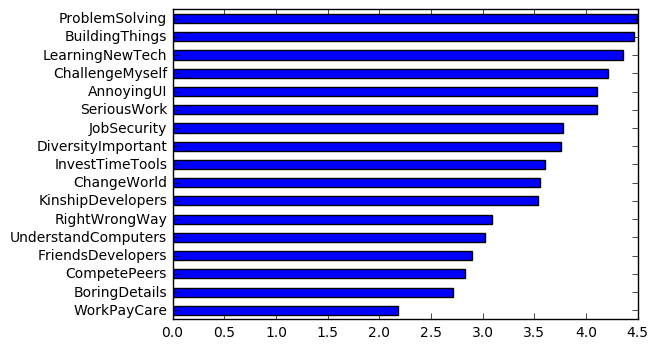

In [61]:
# survey result (agree level) from developer's preference

df_dropna = df.loc[:, var_list].dropna(how='all', axis=0)
df_dropna.mean().sort_values().plot.barh()
plt.show()

## 3. What does developer care about when accessing a potential job?

In [62]:
access_list = ['AssessJobIndustry',
                'AssessJobRole',
                'AssessJobExp',
                'AssessJobDept',
                'AssessJobTech',
                'AssessJobProjects',
                'AssessJobCompensation',
                'AssessJobOffice',
                'AssessJobCommute',
                'AssessJobRemote',
                'AssessJobLeaders',
                'AssessJobProfDevel',
                'AssessJobDiversity',
                'AssessJobProduct',
                'AssessJobFinances']


important_level_dic = {'Not at all important':1, 'Not very important':2, 'Somewhat important':3, 'Important':4, 'Very important':5}


# function that convert important level to 1-5 number
def important_level_convert(x):
    if x in important_level_dic.keys():
        return important_level_dic[x]
    else:
        return x


# convert columns in access_list to 1-5 values
for i in access_list:
    df.loc[:, [i]] = df[i].apply(important_level_convert)
    print(df[i].head())


0    5.0
1    NaN
2    NaN
3    3.0
4    NaN
Name: AssessJobIndustry, dtype: float64
0    5.0
1    NaN
2    NaN
3    3.0
4    NaN
Name: AssessJobRole, dtype: float64
0    4.0
1    NaN
2    NaN
3    3.0
4    NaN
Name: AssessJobExp, dtype: float64
0    5.0
1    NaN
2    NaN
3    4.0
4    NaN
Name: AssessJobDept, dtype: float64
0    5.0
1    NaN
2    NaN
3    4.0
4    NaN
Name: AssessJobTech, dtype: float64
0    5.0
1    NaN
2    NaN
3    5.0
4    NaN
Name: AssessJobProjects, dtype: float64
0    4.0
1    NaN
2    NaN
3    4.0
4    NaN
Name: AssessJobCompensation, dtype: float64
0    5.0
1    NaN
2    NaN
3    5.0
4    NaN
Name: AssessJobOffice, dtype: float64
0    5.0
1    NaN
2    NaN
3    4.0
4    NaN
Name: AssessJobCommute, dtype: float64
0    5.0
1    NaN
2    NaN
3    3.0
4    NaN
Name: AssessJobRemote, dtype: float64
0    5.0
1    NaN
2    NaN
3    2.0
4    NaN
Name: AssessJobLeaders, dtype: float64
0    5.0
1    NaN
2    NaN
3    5.0
4    NaN
Name: AssessJobProfDevel, dtype: float6

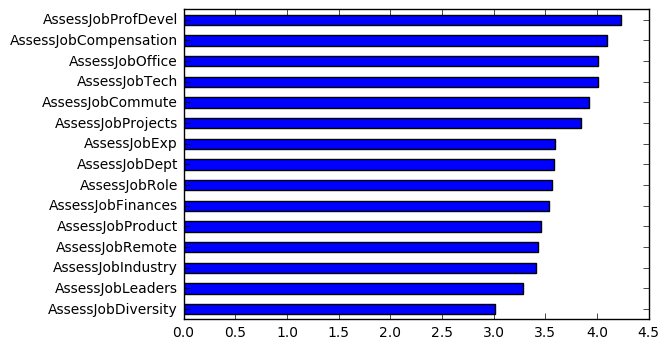

In [63]:
# What does developer care about when accessing a potential job?

access_dropna = df.loc[:, access_list].dropna(how='all', axis=0)
access_dropna.mean().sort_values().plot.barh()
plt.show()

## 4. What is important in Globex's hiring process?

In [64]:
important_list = ['ImportantHiringAlgorithms',
                    'ImportantHiringTechExp',
                    'ImportantHiringCommunication',
                    'ImportantHiringOpenSource',
                    'ImportantHiringPMExp',
                    'ImportantHiringCompanies',
                    'ImportantHiringTitles',
                    'ImportantHiringEducation',
                    'ImportantHiringRep',
                    'ImportantHiringGettingThingsDone',
                    'EducationImportant']

# convert columns in important_list to 1-5 values
for i in important_list:
    df.loc[:, [i]] = df[i].apply(important_level_convert)
    print(df[i].head())

0    4.0
1    4.0
2    NaN
3    3.0
4    NaN
Name: ImportantHiringAlgorithms, dtype: float64
0    4.0
1    4.0
2    NaN
3    3.0
4    NaN
Name: ImportantHiringTechExp, dtype: float64
0    4.0
1    4.0
2    NaN
3    5.0
4    NaN
Name: ImportantHiringCommunication, dtype: float64
0    3.0
1    4.0
2    NaN
3    5.0
4    NaN
Name: ImportantHiringOpenSource, dtype: float64
0    4.0
1    3.0
2    NaN
3    3.0
4    NaN
Name: ImportantHiringPMExp, dtype: float64
0    2.0
1    3.0
2    NaN
3    3.0
4    NaN
Name: ImportantHiringCompanies, dtype: float64
0    2.0
1    2.0
2    NaN
3    2.0
4    NaN
Name: ImportantHiringTitles, dtype: float64
0    1.0
1    3.0
2    NaN
3    2.0
4    NaN
Name: ImportantHiringEducation, dtype: float64
0    3.0
1    2.0
2    NaN
3    4.0
4    NaN
Name: ImportantHiringRep, dtype: float64
0    5.0
1    5.0
2    NaN
3    5.0
4    NaN
Name: ImportantHiringGettingThingsDone, dtype: float64
0    NaN
1    NaN
2    2.0
3    NaN
4    NaN
Name: EducationImportant, dtype: flo

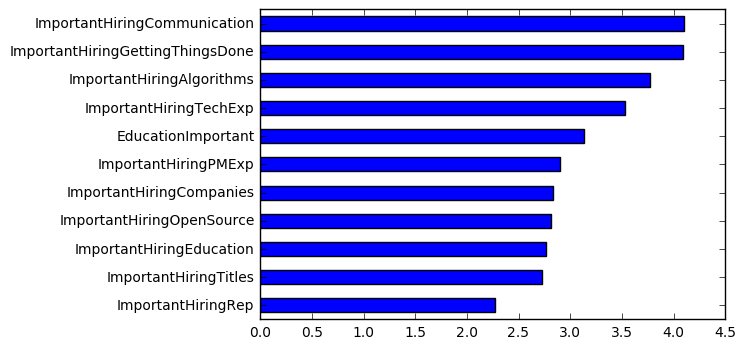

In [65]:
# What is important in Globex's hiring process?

hire_dropna = df.loc[:, important_list].dropna(how='all', axis=0)
hire_dropna.mean().sort_values().plot.barh()
plt.show()

## 5. When most developers prefer to start work?

In [74]:
df.groupby(['WorkStart'])['WorkStart'].count().sort_values()

WorkStart
2:00 AM       35
3:00 AM       50
1:00 AM       53
11:00 PM      85
Midnight      90
4:00 AM      123
7:00 PM      127
5:00 PM      134
9:00 PM      156
3:00 PM      206
10:00 PM     212
4:00 PM      249
6:00 PM      254
8:00 PM      280
5:00 AM      294
1:00 PM      399
2:00 PM      443
Noon        1146
6:00 AM     1216
11:00 AM    2212
7:00 AM     3364
8:00 AM     7076
10:00 AM    9091
9:00 AM     9401
Name: WorkStart, dtype: int64

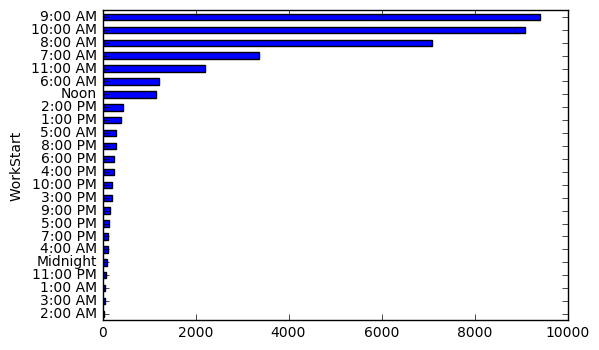

In [73]:
df.groupby(['WorkStart'])['WorkStart'].count().sort_values().plot.barh()
plt.show()